# Requirements

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

# Configuration

In [2]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping on the website https://books.toscrape.com/. Your task includes the extraction of book titles and prices for a minimum of 20 books from this website. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of book prices.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [3]:
# Write your code here. Add as many code boxes as you need.
driver = webdriver.Chrome()

In [4]:
url = 'https://books.toscrape.com/'
driver.get(url)

In [5]:
books = driver.find_element(By.TAG_NAME, 'section').find_elements(By.TAG_NAME, 'div')[1].find_elements(By.CLASS_NAME, 'col-xs-6')

book_list = []

for book in books:
    book_attr = book.text.split('\n')
    tmp = dict()
    tmp['Title'] = book_attr[0]
    tmp['Price'] = float(book_attr[1].split('£')[1])
    book_list.append(tmp)
    # print(tmp)

In [6]:
df = pd.DataFrame(book_list)
df

,Title,Price
0,A Light in the ...,51.77
1,Tipping the Velvet,53.74
2,Soumission,50.10
3,Sharp Objects,47.82
4,Sapiens: A Brief History ...,54.23
5,The Requiem Red,22.65
6,The Dirty Little Secrets ...,33.34
7,The Coming Woman: A ...,17.93
8,The Boys in the ...,22.60
9,The Black Maria,52.15


In [7]:
import matplotlib.pyplot as plt

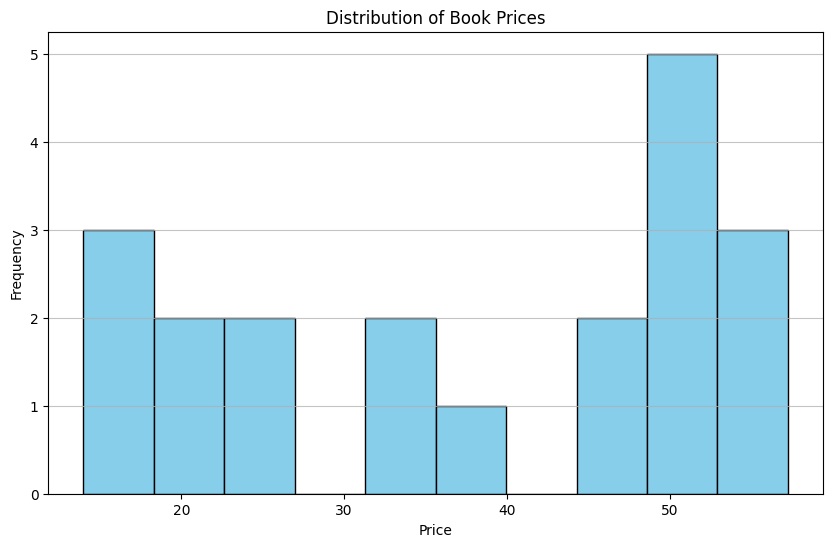

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Book Prices")
plt.grid(axis='y', alpha=0.75)
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

As an additional task, you will need to click on each book listed on the page, proceed to the individual page for each book, and extract the quantity of available copies. Subsequently, you are required to compute both the mean and standard deviation of the quantities of these books.

## Hints
- To click on a specific `element` on a web page use `element.click()`.
- To navigate back to the previous page use `browser.back()`.

## Solution

In [9]:
# Write your code here. Add as many code boxes as you need.

for i in range(len(books)):
    link = books[i].find_element(By.TAG_NAME, 'h3').find_element(By.TAG_NAME, 'a')
    link.click()

    availability_str = driver.find_element(By.CLASS_NAME, 'table').find_element(By.TAG_NAME, 'tbody').find_elements(By.TAG_NAME, 'tr')[5].text
    availability = int(availability_str.split("(")[1].split(" ")[0])
    driver.back()
    book_list[i]['Availability'] = availability

# print(book_list)

In [10]:
data_frame = pd.DataFrame(book_list)
data_frame

,Title,Price,Availability
0,A Light in the ...,51.77,22
1,Tipping the Velvet,53.74,20
2,Soumission,50.10,20
3,Sharp Objects,47.82,20
4,Sapiens: A Brief History ...,54.23,20
5,The Requiem Red,22.65,19
6,The Dirty Little Secrets ...,33.34,19
7,The Coming Woman: A ...,17.93,19
8,The Boys in the ...,22.60,19
9,The Black Maria,52.15,19


In [11]:
mean_availability = data_frame['Availability'].mean()
std_deviation_availability = data_frame['Availability'].std()

print(f"Mean: {mean_availability}")
print(f"Standard Deviation: {std_deviation_availability}")

Mean: 19.35
Standard Deviation: 0.7451598203705944


In [12]:
driver.quit()